In [3]:
from lib.StaticMetricProvider import (
    test_all_introspection_technique_combinations, 
    difference_distances, 
    print_all_introspection_technique_combinations, 
    test_all_introspection_technique_combinations,
    apply_log_to_distances
)
from lib.VisualizationProvider import (
    plot_heatmap, 
    plot_comparison_heatmaps)
from lib.FeatureProvider import (
    load_all_grids, 
    reduce_dimensionality_umap)

2023-10-25 14:54:53.570395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 14:55:06.492778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-12.0/lib64
2023-10-25 14:55:06.493128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/ponel/python/lib/pyt

# Correct Grids vs. RandLabels grids (High Dimension) [CNN/Cifar10]

In [4]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
MAX_IMAGES = 100

In [5]:
all_grids_1 = load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK1, max_images=MAX_IMAGES)
all_grids_2 = load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK2, max_images=MAX_IMAGES)

distances_cnn_cifar_correct, introspection_techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_1, print_results=False)
distances_cnn_cifar_randlabels, _, _ = test_all_introspection_technique_combinations(all_grids_2, print_results=False)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

In [6]:
difference_foldchange_log = difference_distances(
    reference=distances_cnn_cifar_correct, 
    delta=distances_cnn_cifar_randlabels, 
    print_results=False, 
    fold_change_and_log_scale=True)

In [7]:
# Set a fixed scale for the heatmaps
heatmap_scale = (-5, 15)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


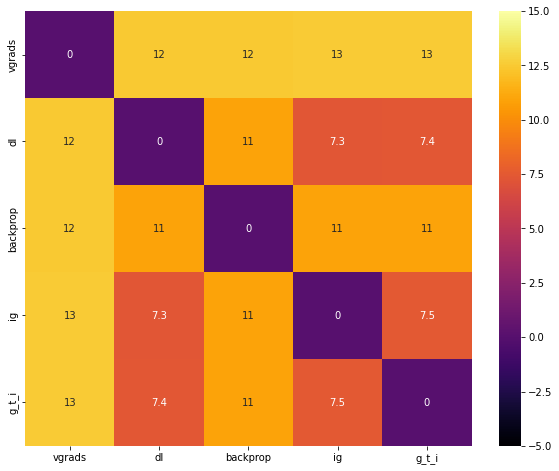

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


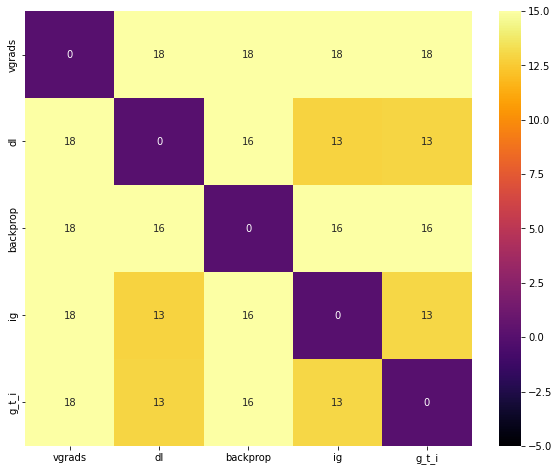

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


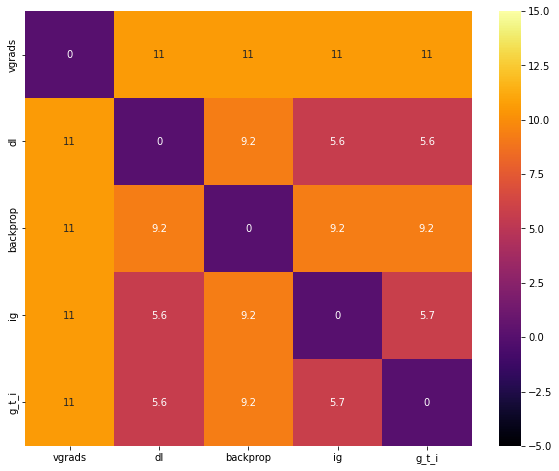

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


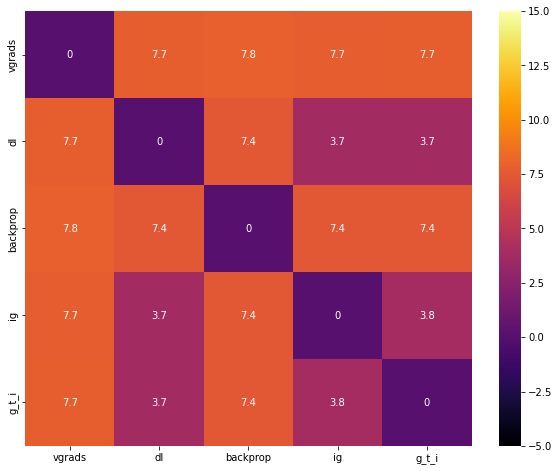

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


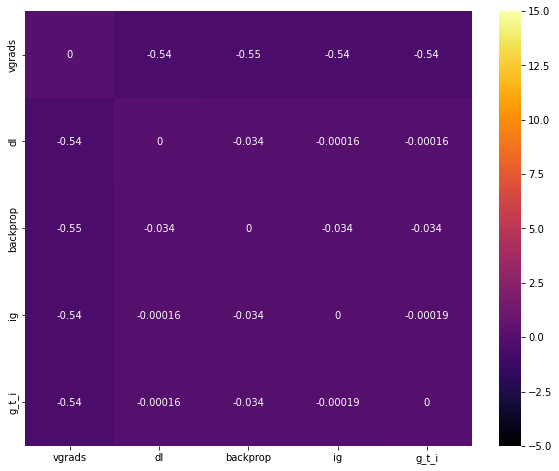

----------------------------------------------------------------------------------------------------


In [8]:
plot_heatmap(
    distances=apply_log_to_distances(distances_cnn_cifar_correct), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    color_scale=heatmap_scale)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


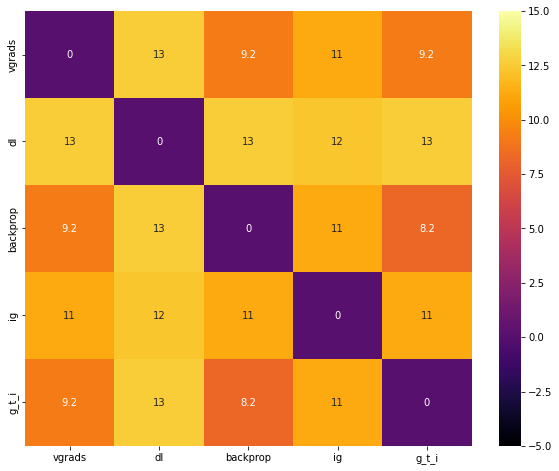

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


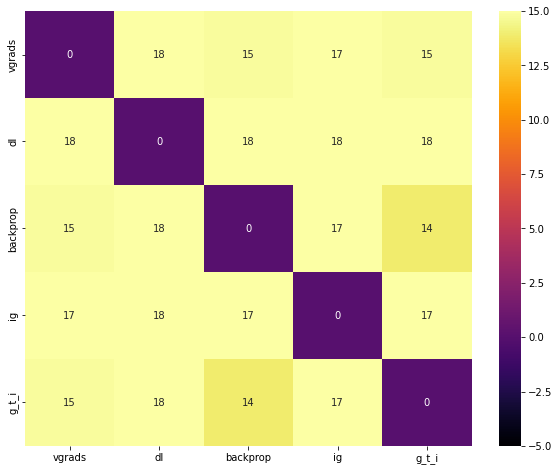

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


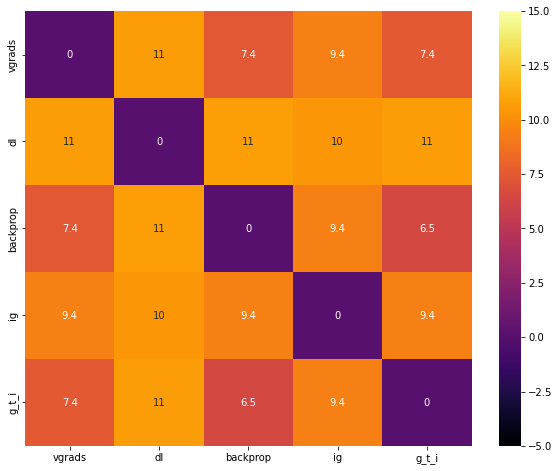

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


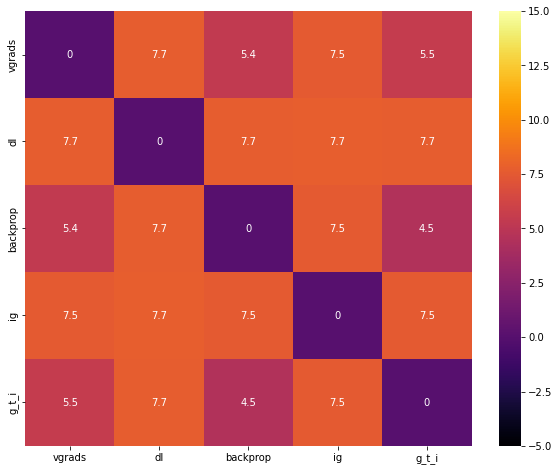

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


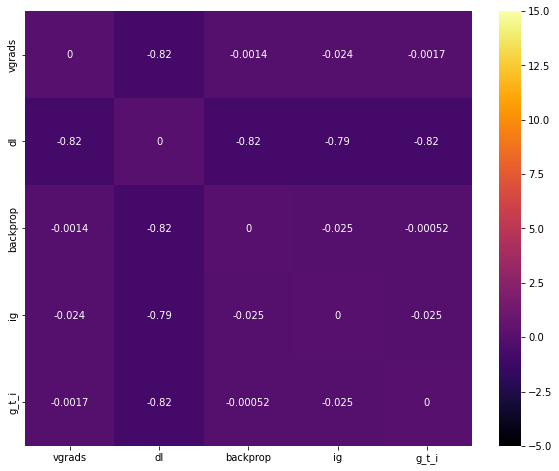

----------------------------------------------------------------------------------------------------


In [9]:
plot_heatmap(
    apply_log_to_distances(distances_cnn_cifar_randlabels), 
    introspection_techniques, 
    distance_functions, 
    color_scale=heatmap_scale)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


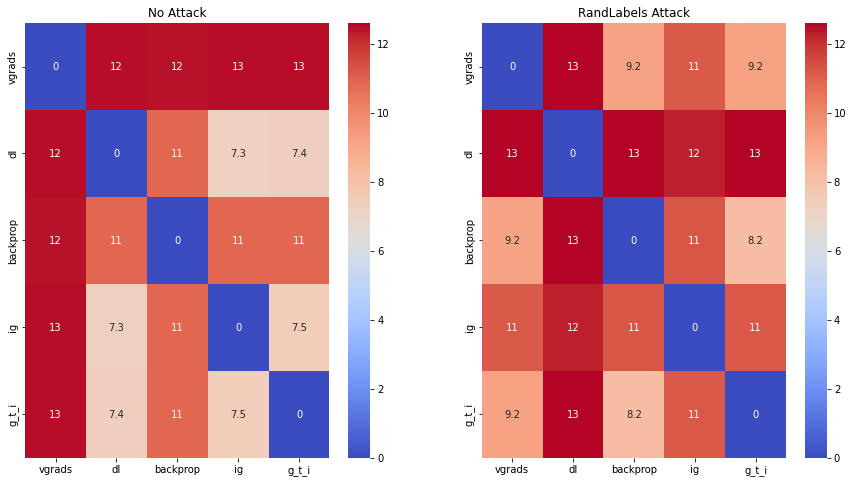

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


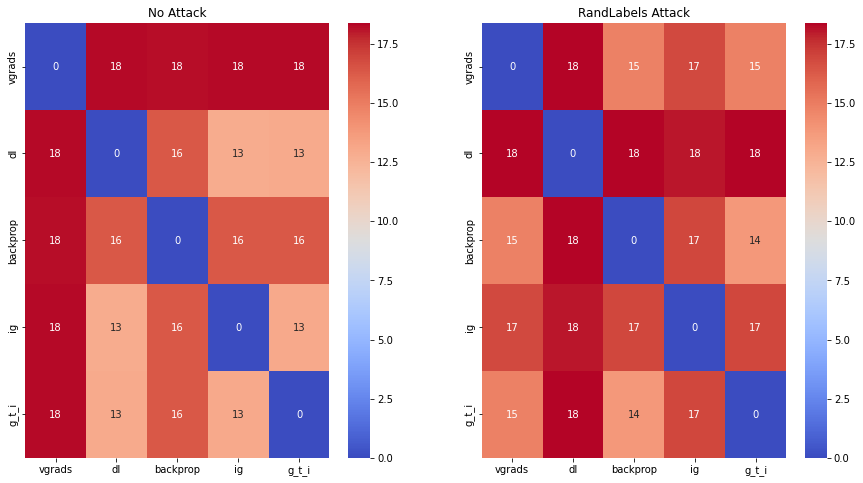

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


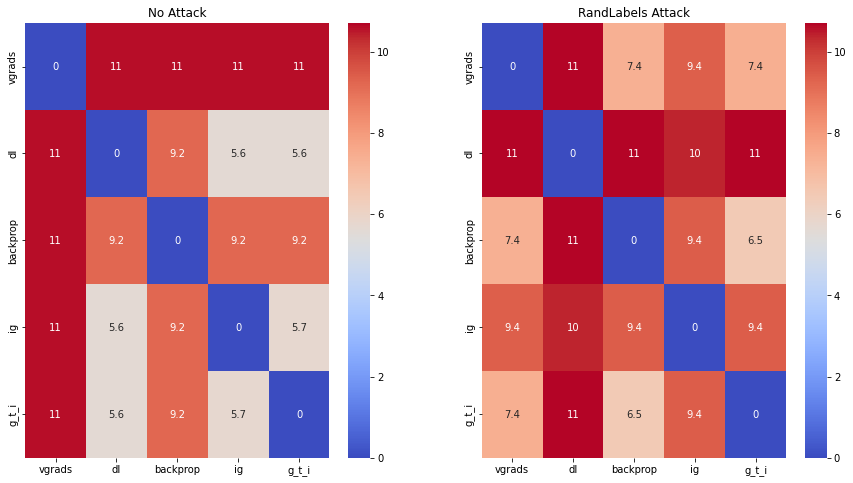

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


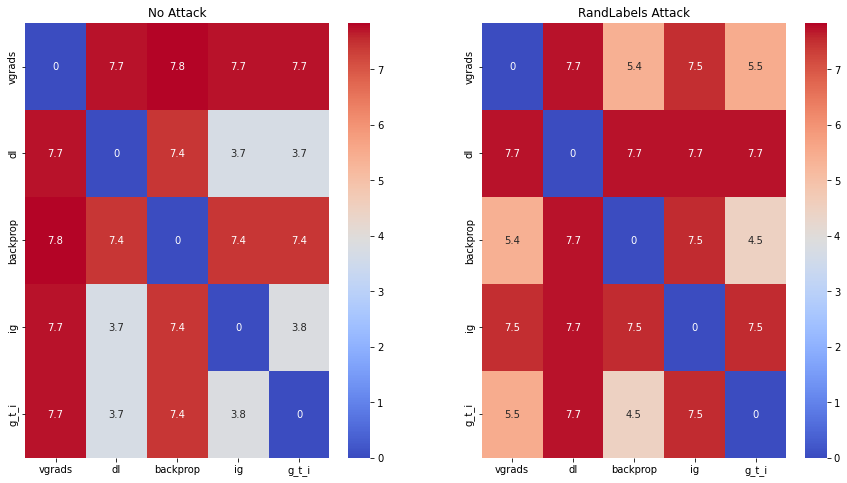

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


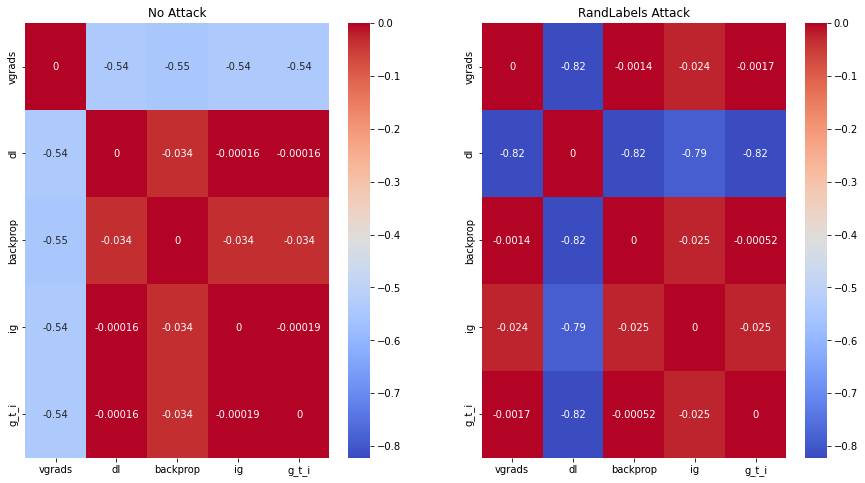

----------------------------------------------------------------------------------------------------


In [10]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_cifar_correct), 
    distances2=apply_log_to_distances(distances_cnn_cifar_randlabels), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="No Attack",
    title_distances2="RandLabels Attack"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


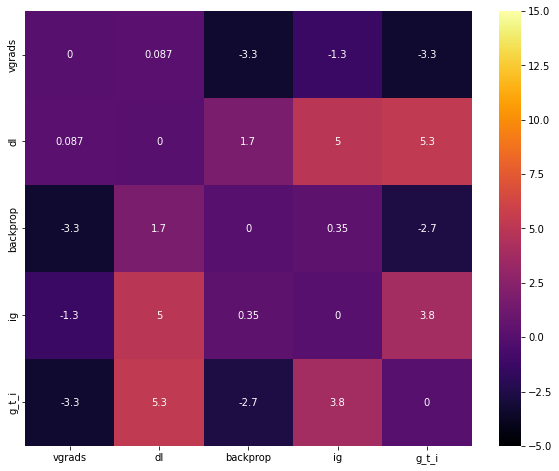

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


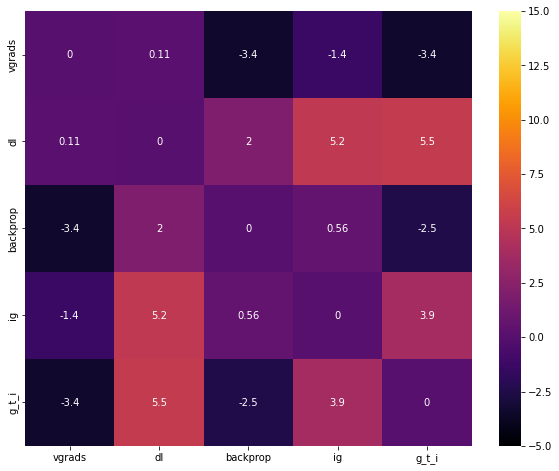

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


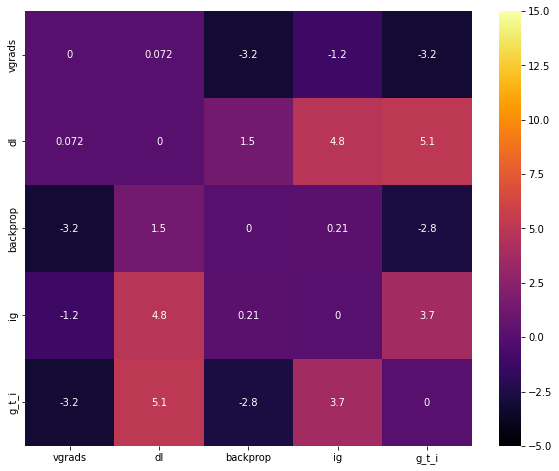

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


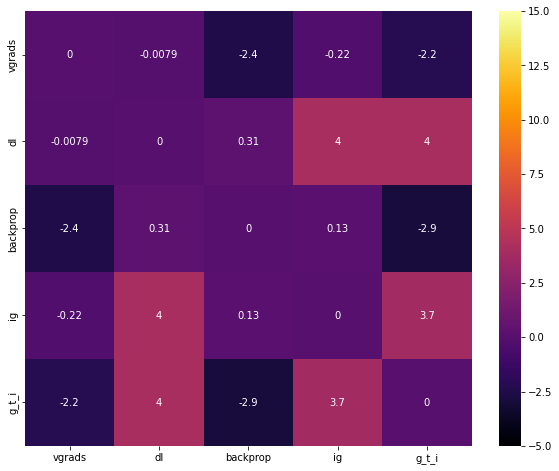

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


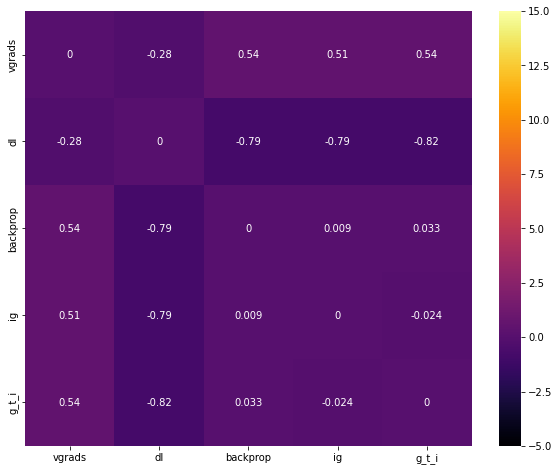

----------------------------------------------------------------------------------------------------


In [11]:
plot_heatmap(
    distances=difference_foldchange_log, 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    color_scale=heatmap_scale)

# This part requires Adjustments!!
Correct Grids on CNN/Cifar10 vs. RandLabels grids (Same Dimension)

In [6]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
MAX_IMAGES = 100

In [7]:
all_grids_1 = reduce_dimensionality_umap(load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK1, max_images=MAX_IMAGES), 2)
all_grids_2 = reduce_dimensionality_umap(load_all_grids(model_type=MODEL_TYPE, dataset=DATASET, attack=ATTACK2, max_images=MAX_IMAGES), 2)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 ou

In [8]:
distances1, introspection_techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_1, print_results=False, use_ssim=False)
distances2, _, _ = test_all_introspection_technique_combinations(all_grids_2, print_results=False, use_ssim=False)

In [9]:
difference_zscore_percentage2 = difference_distances(reference = distances1, delta = distances2, print_results=False, as_percentage=True, use_z_score=True)
difference_percentage2 = difference_distances(reference = distances1, delta = distances2, print_results=False, as_percentage=True, use_logarithmic_scale=False)
difference_absolute2 = difference_distances(reference = distances1, delta = distances2, print_results=False, as_percentage=False, use_logarithmic_scale=False)

In [10]:
print_all_introspection_technique_combinations(distances1, introspection_techniques, distance_functions)
print_all_introspection_technique_combinations(distances2, introspection_techniques, distance_functions)

----------------------------------------------------------------------------------------------------
Distance function: euclidean
             vgrads         dl   backprop        ig      g_t_i
vgrads     0.000000  10.032360  15.490392  8.253414  10.209127
dl        10.032360   0.000000   6.541942  5.195767   2.736445
backprop  15.490392   6.541942   0.000000  8.360934   6.393415
ig         8.253414   5.195767   8.360934  0.000000   4.914600
g_t_i     10.209127   2.736445   6.393415  4.914600   0.000000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan
             vgrads         dl   backprop         ig      g_t_i
vgrads     0.000000  11.119463  19.069338  11.240042  12.319087
dl        11.119463   0.000000   8.373890   7.295981   3.543893
backprop  19.069338   8.373890   0.000000   9.668213   7.919488
ig   

----------------------------------------------------------------------------------------------------
Distance function: euclidean


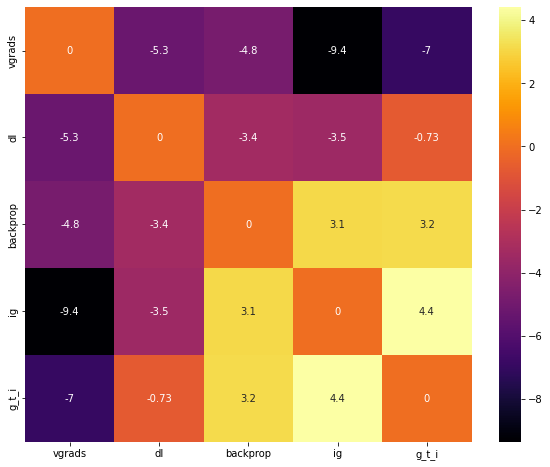

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


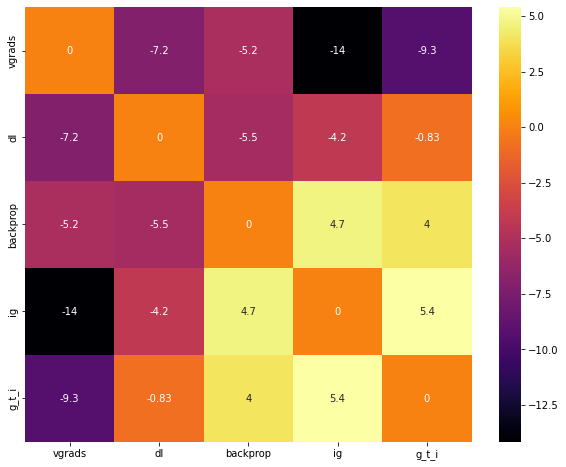

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


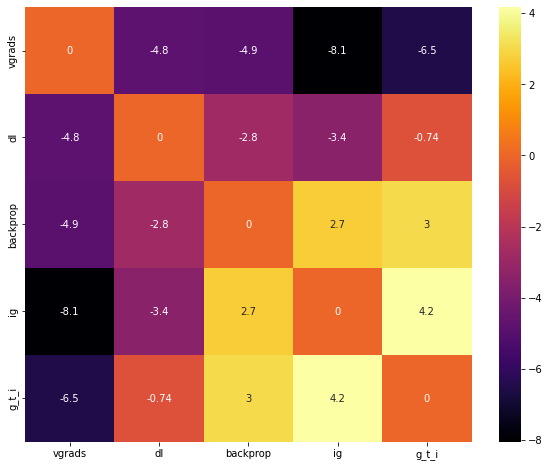

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


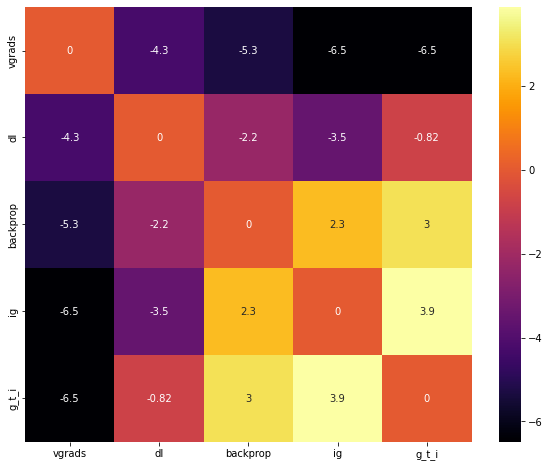

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


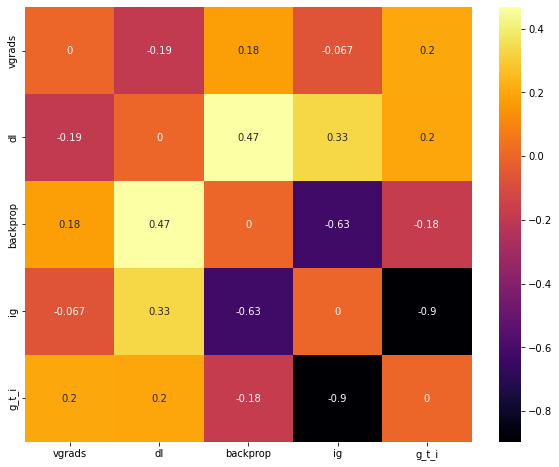

----------------------------------------------------------------------------------------------------


In [14]:
plot_heatmap(difference_absolute2, introspection_techniques, distance_functions)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


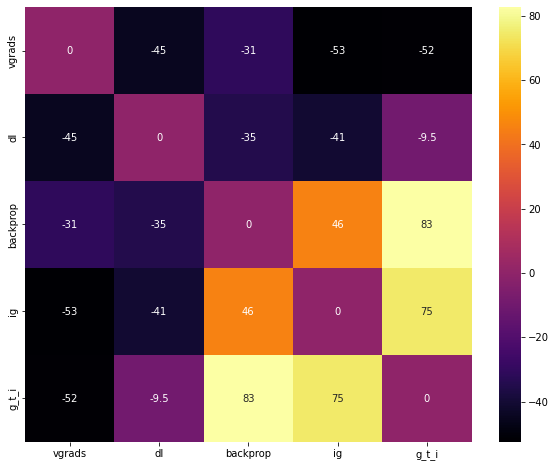

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


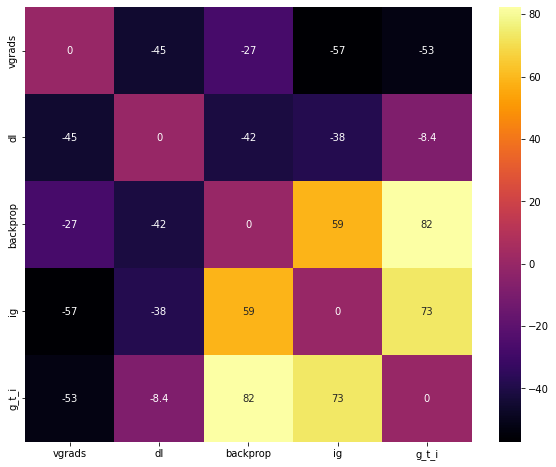

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


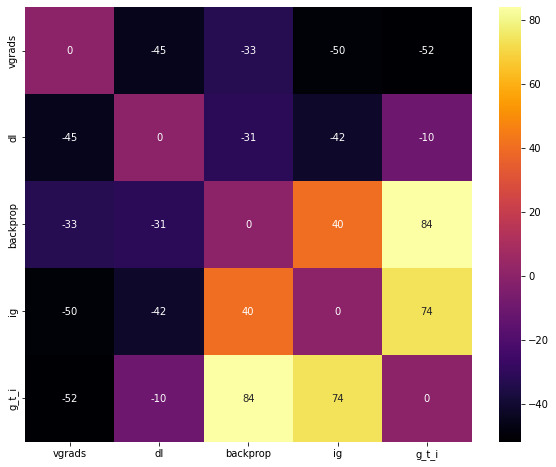

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


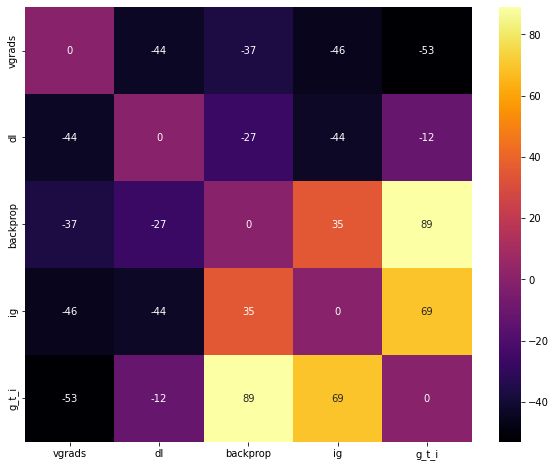

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


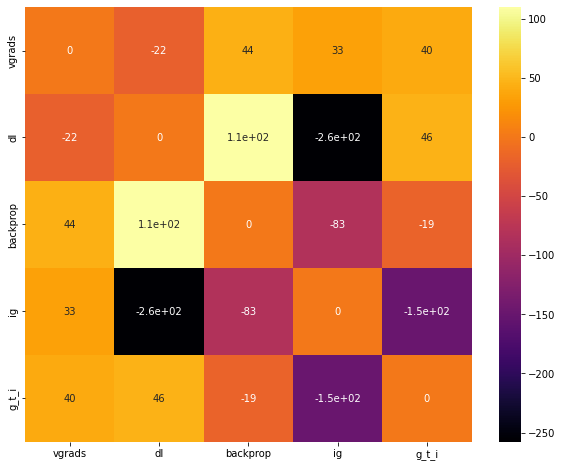

----------------------------------------------------------------------------------------------------


In [15]:
plot_heatmap(difference_percentage2, introspection_techniques, distance_functions)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


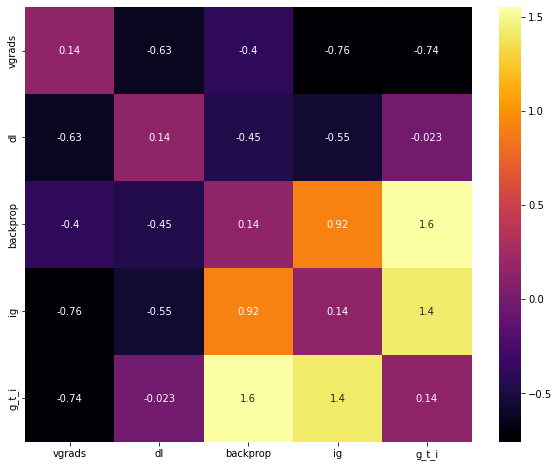

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


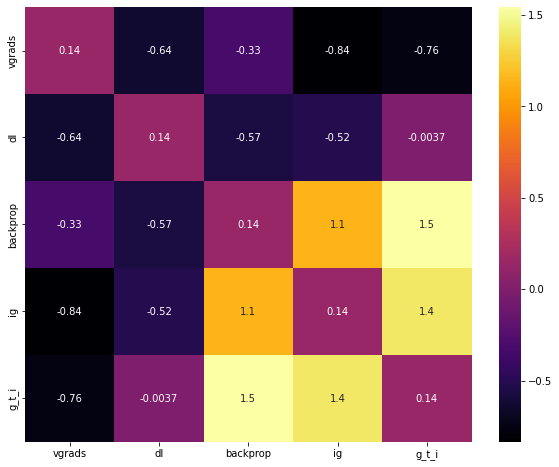

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


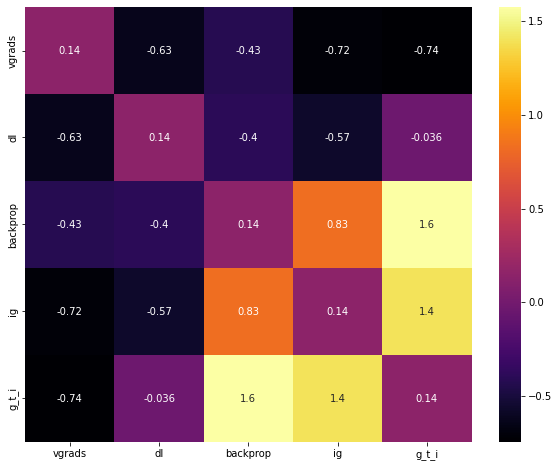

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


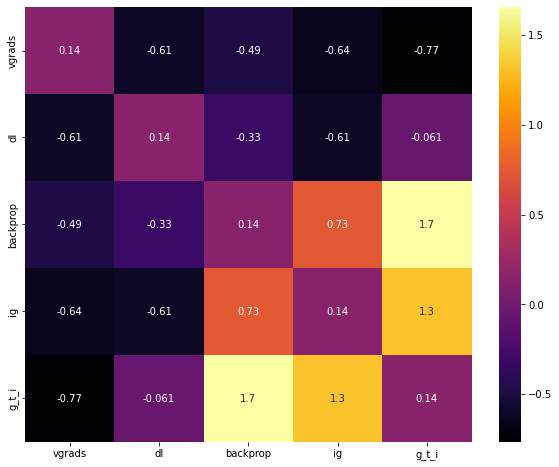

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


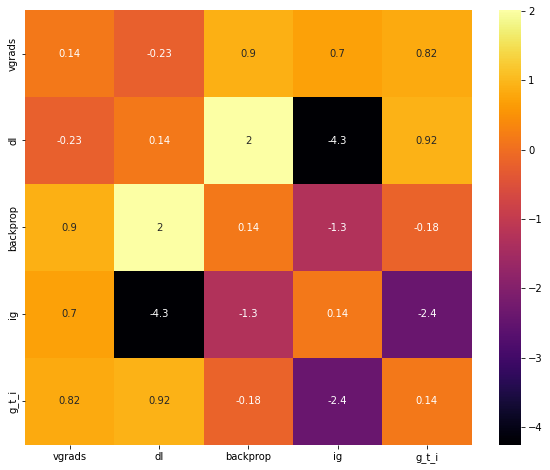

----------------------------------------------------------------------------------------------------


In [16]:
plot_heatmap(difference_zscore_percentage2, introspection_techniques, distance_functions)

## Side-by-Side Comparison (May also requires Adjustments)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


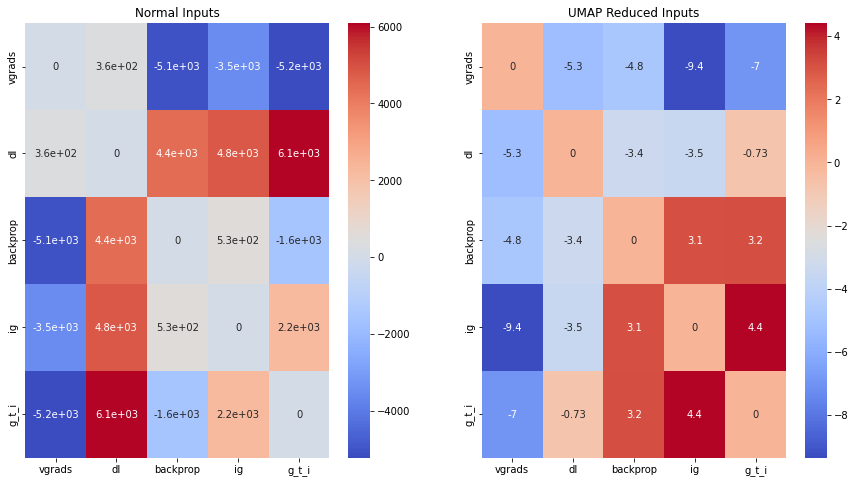

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


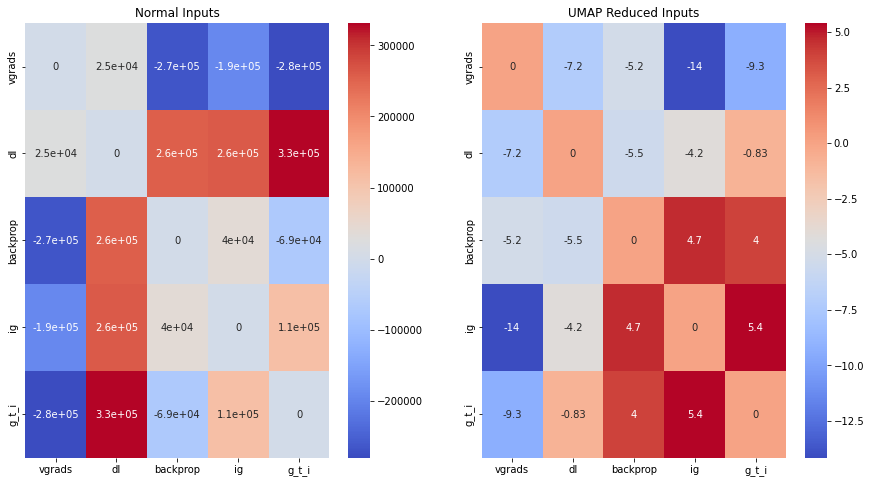

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


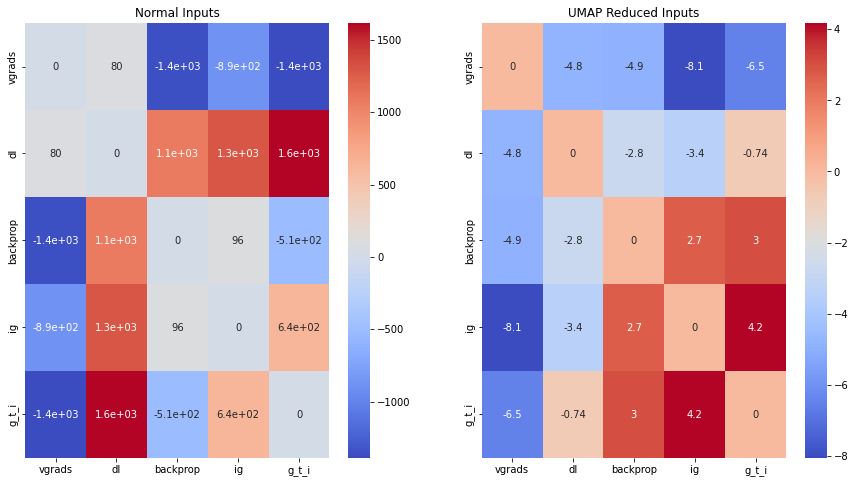

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


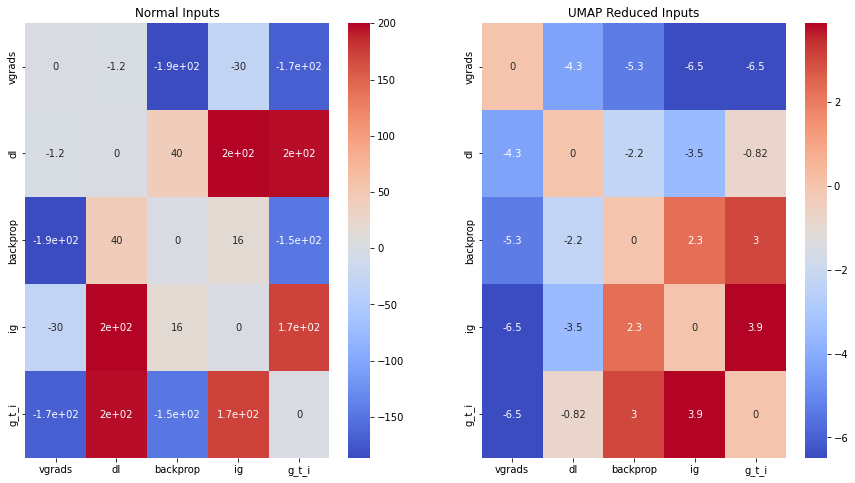

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


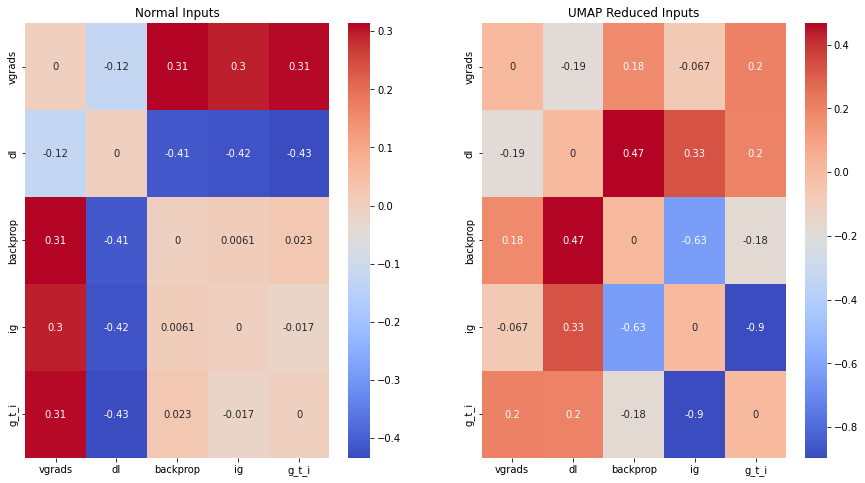

----------------------------------------------------------------------------------------------------


In [17]:
plot_comparison_heatmaps(difference_absolute, difference_absolute2, introspection_techniques, distance_functions, use_diverging=True)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


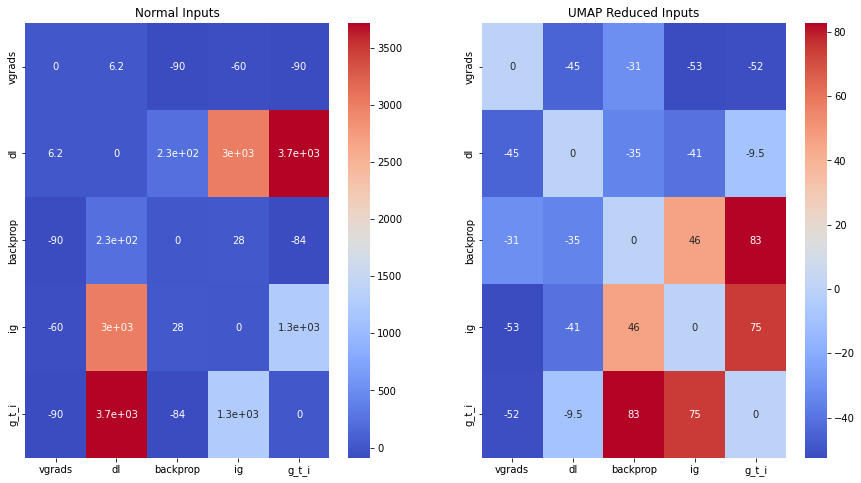

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


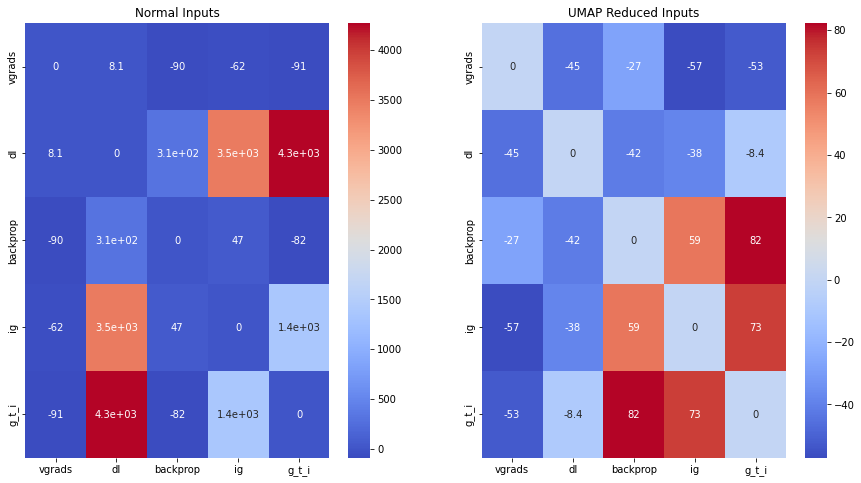

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


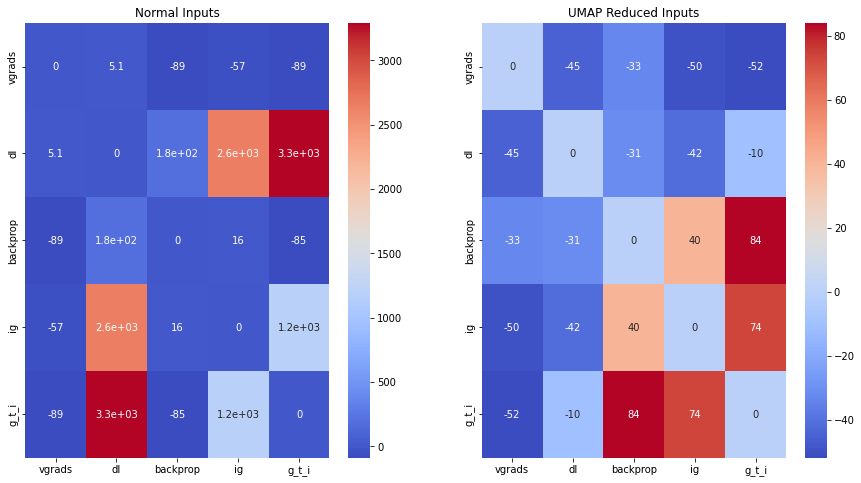

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


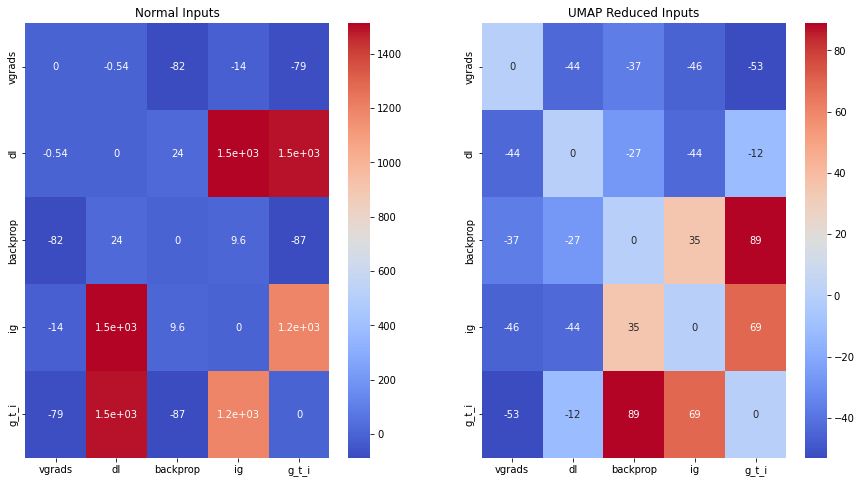

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


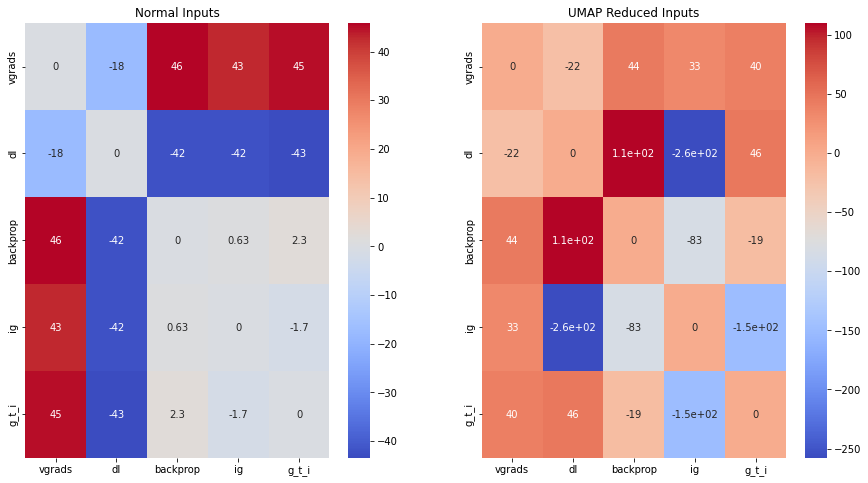

----------------------------------------------------------------------------------------------------


In [18]:
plot_comparison_heatmaps(difference_percentage, difference_percentage2, introspection_techniques, distance_functions, use_diverging=True)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


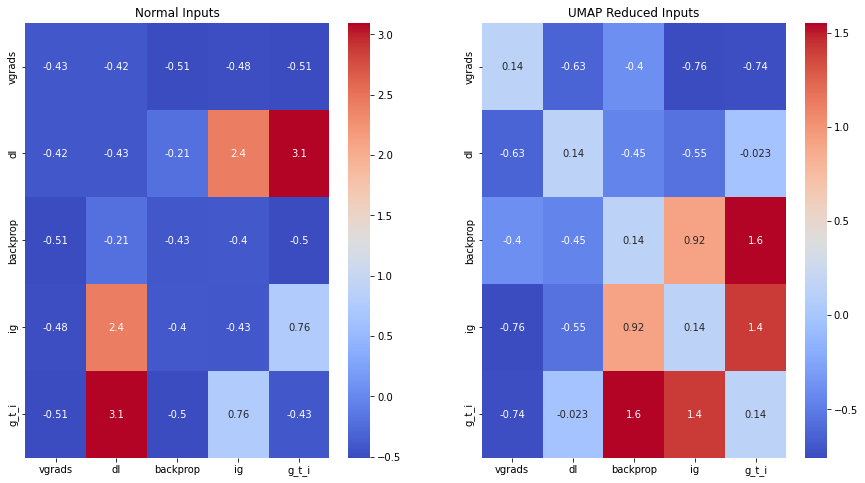

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


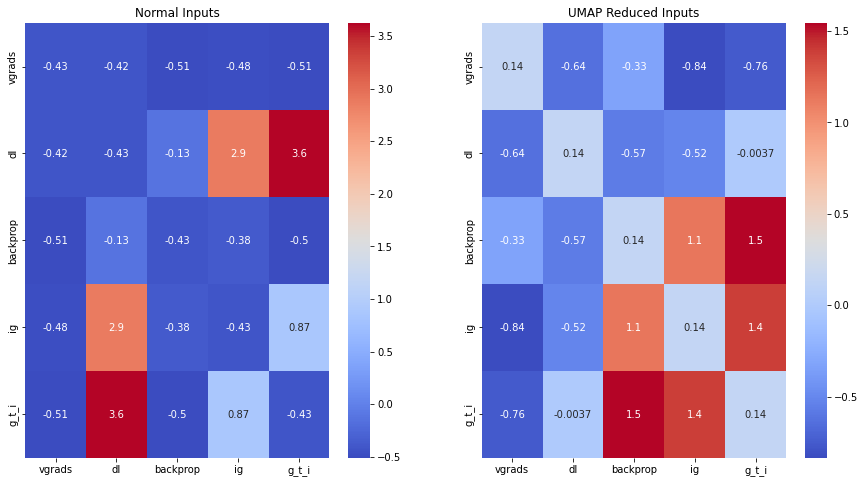

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


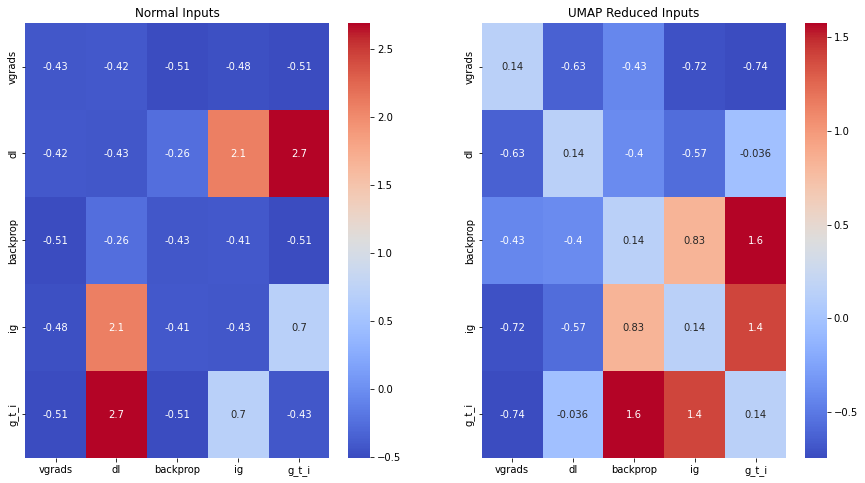

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


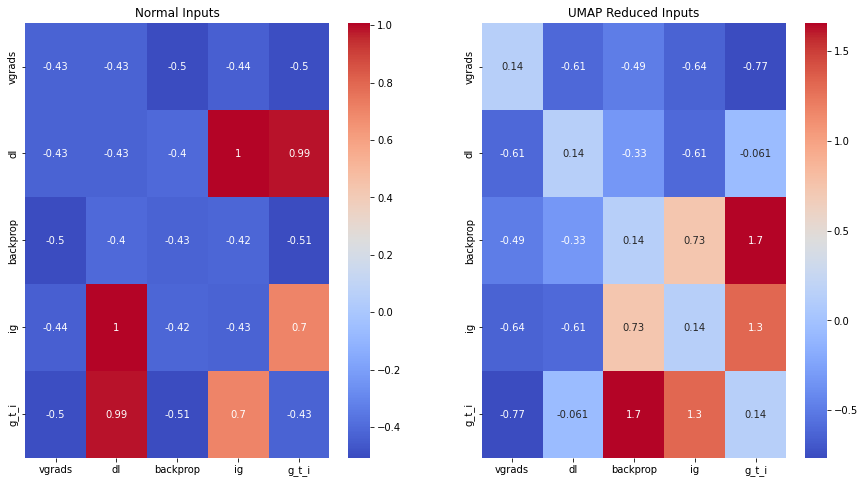

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


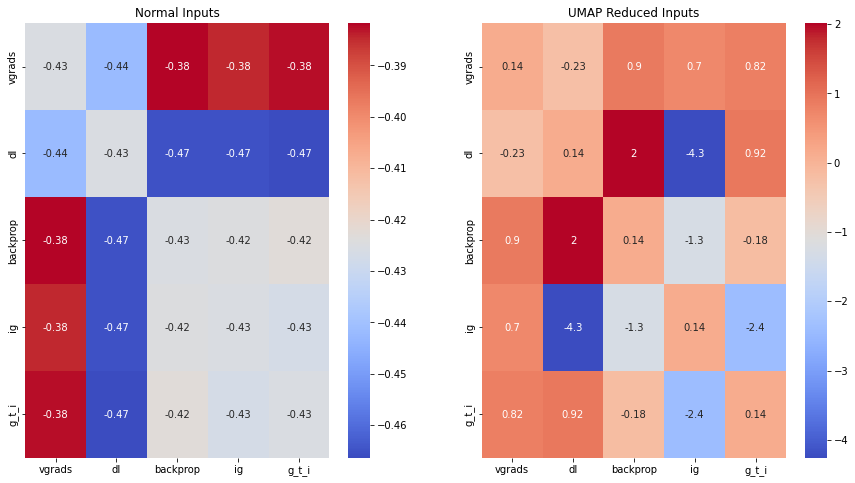

----------------------------------------------------------------------------------------------------


In [19]:
plot_comparison_heatmaps(difference_zscore_percentage, difference_zscore_percentage2, introspection_techniques, distance_functions, use_diverging=True)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


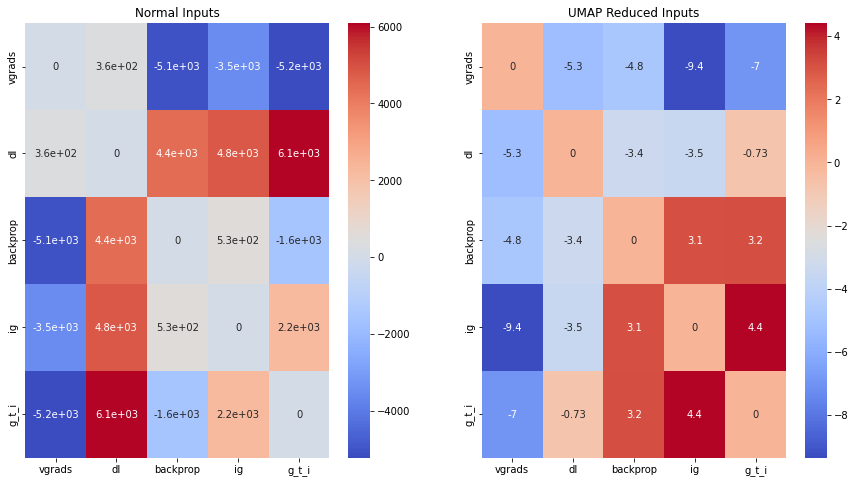

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


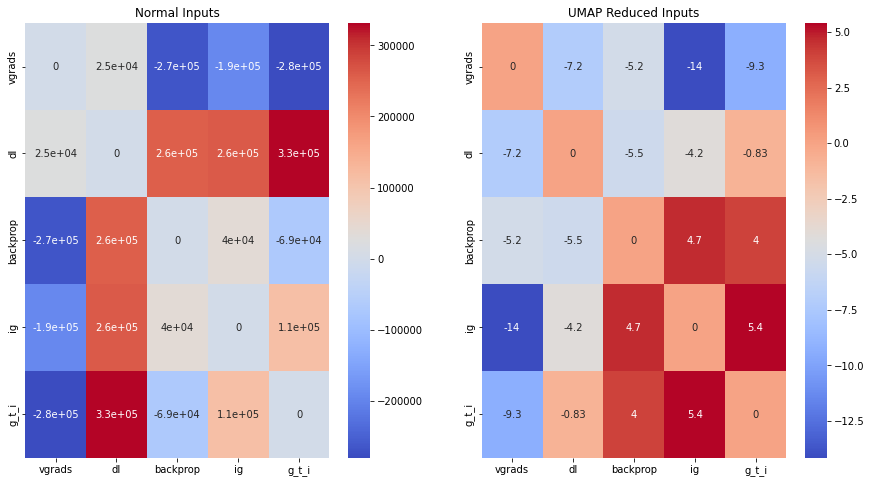

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


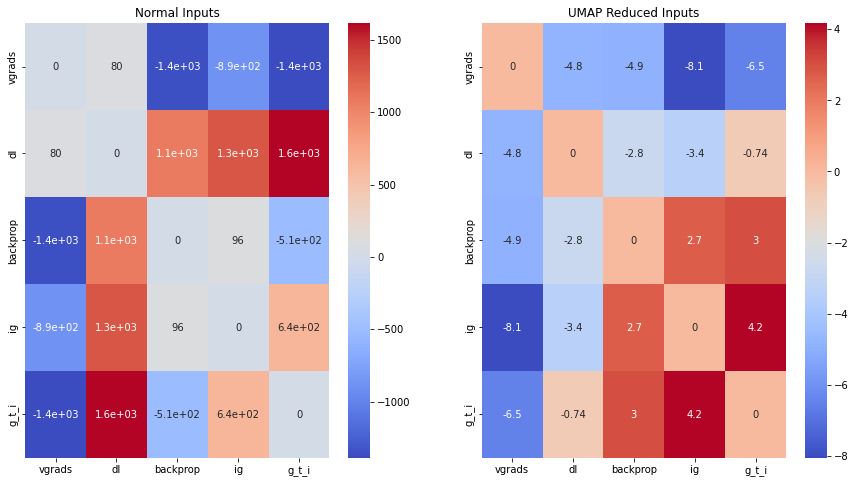

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


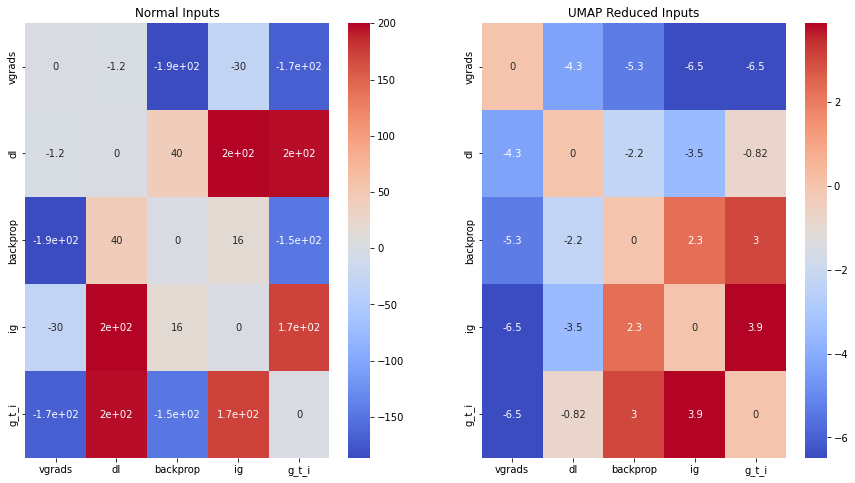

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


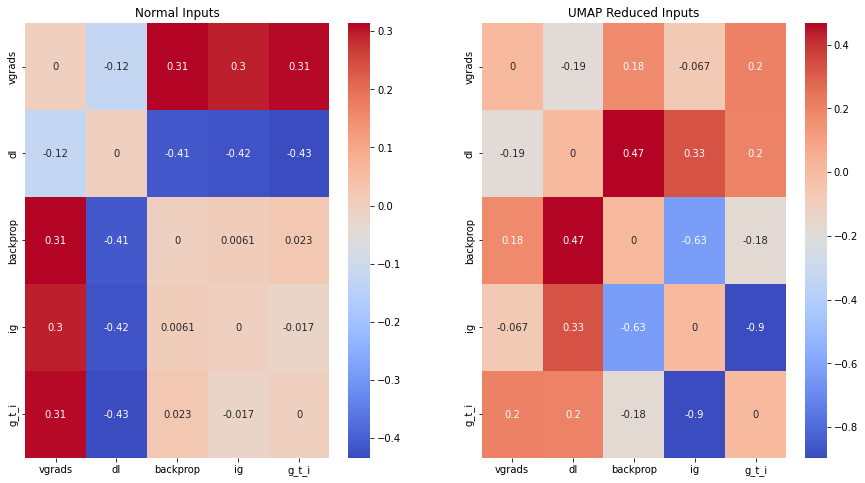

----------------------------------------------------------------------------------------------------


In [20]:
plot_comparison(difference_absolute, difference_absolute2, introspection_techniques, distance_functions, plot_type='heatmap', use_diverging=True)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


ValueError: too many values to unpack (expected 2)

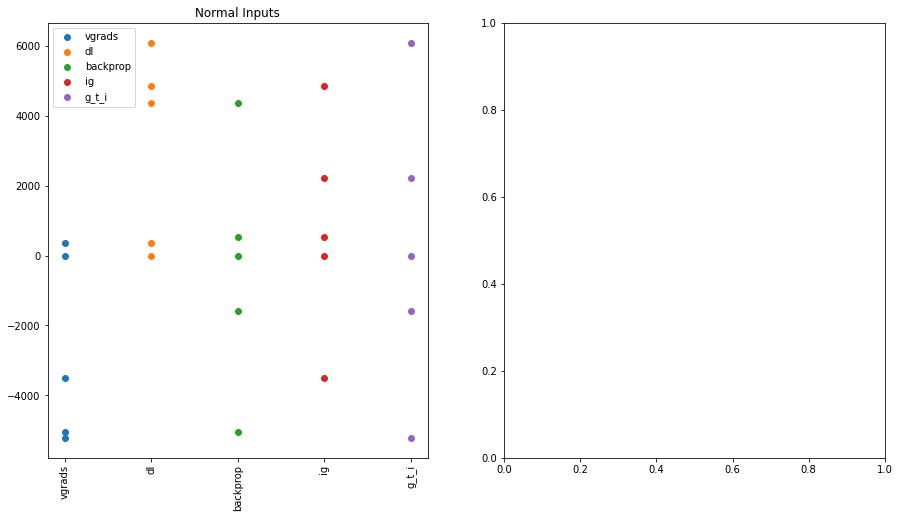

In [11]:
plot_comparison(difference_absolute, difference_absolute2, introspection_techniques, distance_functions, plot_type='scatter', use_diverging=True)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

for distance_function in distance_functions:
    print("-" * 100)
    print(f"Distance function: {distance_function}")

    # Create DataFrames from the diff_distances arrays for normal and UMAP reduced inputs
    normal_df = pd.DataFrame(difference_absolute, columns=introspection_techniques, index=introspection_techniques)
    umap_df = pd.DataFrame(difference_absolute2, columns=introspection_techniques, index=introspection_techniques)

    # Select only the values for the current distance function
    normal_df = normal_df.applymap(lambda x: x[distance_function])
    umap_df = umap_df.applymap(lambda x: x[distance_function])

    # Create subplots for side by side comparison
#     fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Plot normal input scatter plot
    for i, technique in enumerate(introspection_techniques):
        x_coords = [i] * len(introspection_techniques)
        y_coords = normal_df[technique].values
        print(technique)
        print(x_coords)
        print(y_coords)

----------------------------------------------------------------------------------------------------
Distance function: euclidean
vgrads
[0, 0, 0, 0, 0]
[    0.           360.47296669 -5055.66403266 -3500.7384828
 -5220.49778158]
dl
[1, 1, 1, 1, 1]
[ 360.47296669    0.         4374.53739133 4849.84185275 6092.03555311]
backprop
[2, 2, 2, 2, 2]
[-5055.66403266  4374.53739133     0.           525.73730097
 -1587.78936261]
ig
[3, 3, 3, 3, 3]
[-3500.7384828   4849.84185275   525.73730097     0.
  2219.24647703]
g_t_i
[4, 4, 4, 4, 4]
[-5220.49778158  6092.03555311 -1587.78936261  2219.24647703
     0.        ]
----------------------------------------------------------------------------------------------------
Distance function: manhattan
vgrads
[0, 0, 0, 0, 0]
[      0.     24949.74 -268201.99 -192553.38 -280459.25]
dl
[1, 1, 1, 1, 1]
[ 24949.74      0.   256349.99 261990.6  331476.09]
backprop
[2, 2, 2, 2, 2]
[-268201.99  256349.99       0.     39631.55  -68557.12]
ig
[3, 3, 3, 3, 3]
[-192